## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9743119	total: 61.3ms	remaining: 1m 1s
1:	learn: 0.9419394	total: 61.6ms	remaining: 30.7s
2:	learn: 0.9101684	total: 62ms	remaining: 20.6s
3:	learn: 0.8794723	total: 62.3ms	remaining: 15.5s
4:	learn: 0.8507943	total: 62.7ms	remaining: 12.5s


5:	learn: 0.8249693	total: 68.4ms	remaining: 11.3s
6:	learn: 0.7989164	total: 69.7ms	remaining: 9.88s
7:	learn: 0.7741018	total: 70.1ms	remaining: 8.7s
8:	learn: 0.7484767	total: 70.4ms	remaining: 7.75s
9:	learn: 0.7239368	total: 70.9ms	remaining: 7.02s
10:	learn: 0.7016669	total: 71.2ms	remaining: 6.4s
11:	learn: 0.6811100	total: 71.9ms	remaining: 5.92s
12:	learn: 0.6594418	total: 72.4ms	remaining: 5.5s
13:	learn: 0.6392715	total: 73.1ms	remaining: 5.14s
14:	learn: 0.6191830	total: 73.5ms	remaining: 4.83s
15:	learn: 0.5988045	total: 74.1ms	remaining: 4.55s
16:	learn: 0.5822435	total: 74.5ms	remaining: 4.31s
17:	learn: 0.5652731	total: 75ms	remaining: 4.09s
18:	learn: 0.5491166	total: 75.3ms	remaining: 3.89s
19:	learn: 0.5316785	total: 75.8ms	remaining: 3.71s
20:	learn: 0.5172733	total: 76.2ms	remaining: 3.55s
21:	learn: 0.5026615	total: 76.6ms	remaining: 3.4s
22:	learn: 0.4874835	total: 76.9ms	remaining: 3.27s
23:	learn: 0.4736800	total: 77.4ms	remaining: 3.15s
24:	learn: 0.4594263	to

111:	learn: 0.0719451	total: 137ms	remaining: 1.09s
112:	learn: 0.0710061	total: 138ms	remaining: 1.08s
113:	learn: 0.0699380	total: 139ms	remaining: 1.08s
114:	learn: 0.0689922	total: 142ms	remaining: 1.09s
115:	learn: 0.0680133	total: 143ms	remaining: 1.09s
116:	learn: 0.0670880	total: 143ms	remaining: 1.08s
117:	learn: 0.0662909	total: 143ms	remaining: 1.07s
118:	learn: 0.0657900	total: 143ms	remaining: 1.06s
119:	learn: 0.0651623	total: 144ms	remaining: 1.05s
120:	learn: 0.0645034	total: 144ms	remaining: 1.05s
121:	learn: 0.0638865	total: 144ms	remaining: 1.04s
122:	learn: 0.0632105	total: 145ms	remaining: 1.03s
123:	learn: 0.0623868	total: 149ms	remaining: 1.05s
124:	learn: 0.0618216	total: 149ms	remaining: 1.05s
125:	learn: 0.0614593	total: 150ms	remaining: 1.04s
126:	learn: 0.0609956	total: 150ms	remaining: 1.03s
127:	learn: 0.0603590	total: 150ms	remaining: 1.02s
128:	learn: 0.0598502	total: 151ms	remaining: 1.02s
129:	learn: 0.0593098	total: 151ms	remaining: 1.01s
130:	learn: 

174:	learn: 0.0459583	total: 170ms	remaining: 803ms
175:	learn: 0.0458126	total: 170ms	remaining: 798ms
176:	learn: 0.0456580	total: 171ms	remaining: 794ms
177:	learn: 0.0454922	total: 174ms	remaining: 801ms
178:	learn: 0.0453169	total: 174ms	remaining: 797ms
179:	learn: 0.0451423	total: 174ms	remaining: 793ms
180:	learn: 0.0449346	total: 174ms	remaining: 789ms
181:	learn: 0.0448167	total: 175ms	remaining: 785ms
182:	learn: 0.0446653	total: 175ms	remaining: 781ms
183:	learn: 0.0445231	total: 175ms	remaining: 777ms
184:	learn: 0.0444051	total: 175ms	remaining: 773ms
185:	learn: 0.0442369	total: 176ms	remaining: 769ms
186:	learn: 0.0439423	total: 176ms	remaining: 765ms
187:	learn: 0.0438343	total: 176ms	remaining: 762ms
188:	learn: 0.0435672	total: 177ms	remaining: 758ms
189:	learn: 0.0434050	total: 177ms	remaining: 754ms
190:	learn: 0.0432582	total: 177ms	remaining: 750ms
191:	learn: 0.0431357	total: 177ms	remaining: 747ms
192:	learn: 0.0429796	total: 178ms	remaining: 743ms
193:	learn: 

356:	learn: 0.0281905	total: 246ms	remaining: 444ms
357:	learn: 0.0281383	total: 247ms	remaining: 443ms
358:	learn: 0.0281023	total: 248ms	remaining: 443ms
359:	learn: 0.0280489	total: 248ms	remaining: 441ms
360:	learn: 0.0279773	total: 248ms	remaining: 440ms
361:	learn: 0.0279310	total: 249ms	remaining: 438ms
362:	learn: 0.0278603	total: 249ms	remaining: 437ms
363:	learn: 0.0278002	total: 249ms	remaining: 436ms
364:	learn: 0.0277411	total: 250ms	remaining: 434ms
365:	learn: 0.0276731	total: 250ms	remaining: 433ms
366:	learn: 0.0276378	total: 251ms	remaining: 433ms
367:	learn: 0.0276009	total: 252ms	remaining: 432ms
368:	learn: 0.0275441	total: 252ms	remaining: 431ms
369:	learn: 0.0274822	total: 252ms	remaining: 429ms
370:	learn: 0.0274480	total: 253ms	remaining: 428ms
371:	learn: 0.0273811	total: 253ms	remaining: 427ms
372:	learn: 0.0273525	total: 253ms	remaining: 425ms
373:	learn: 0.0273088	total: 254ms	remaining: 425ms
374:	learn: 0.0272762	total: 254ms	remaining: 423ms
375:	learn: 

492:	learn: 0.0230181	total: 295ms	remaining: 303ms
493:	learn: 0.0229752	total: 297ms	remaining: 304ms
494:	learn: 0.0229445	total: 298ms	remaining: 304ms
495:	learn: 0.0229044	total: 298ms	remaining: 303ms
496:	learn: 0.0228770	total: 298ms	remaining: 302ms
497:	learn: 0.0228478	total: 299ms	remaining: 301ms
498:	learn: 0.0228360	total: 299ms	remaining: 300ms
499:	learn: 0.0228192	total: 299ms	remaining: 299ms
500:	learn: 0.0228081	total: 300ms	remaining: 299ms
501:	learn: 0.0227637	total: 300ms	remaining: 298ms
502:	learn: 0.0227337	total: 301ms	remaining: 297ms
503:	learn: 0.0226956	total: 301ms	remaining: 296ms
504:	learn: 0.0226838	total: 301ms	remaining: 295ms
505:	learn: 0.0226467	total: 301ms	remaining: 294ms
506:	learn: 0.0226321	total: 302ms	remaining: 293ms
507:	learn: 0.0225916	total: 302ms	remaining: 293ms
508:	learn: 0.0225837	total: 303ms	remaining: 292ms
509:	learn: 0.0225698	total: 303ms	remaining: 291ms
510:	learn: 0.0225412	total: 304ms	remaining: 291ms
511:	learn: 

704:	learn: 0.0183090	total: 373ms	remaining: 156ms
705:	learn: 0.0182938	total: 374ms	remaining: 156ms
706:	learn: 0.0182824	total: 376ms	remaining: 156ms
707:	learn: 0.0182719	total: 377ms	remaining: 155ms
708:	learn: 0.0182603	total: 377ms	remaining: 155ms
709:	learn: 0.0182204	total: 377ms	remaining: 154ms
710:	learn: 0.0181981	total: 378ms	remaining: 154ms
711:	learn: 0.0181715	total: 379ms	remaining: 153ms
712:	learn: 0.0181492	total: 379ms	remaining: 153ms
713:	learn: 0.0181375	total: 379ms	remaining: 152ms
714:	learn: 0.0181282	total: 380ms	remaining: 151ms
715:	learn: 0.0181121	total: 380ms	remaining: 151ms
716:	learn: 0.0181001	total: 380ms	remaining: 150ms
717:	learn: 0.0180896	total: 381ms	remaining: 149ms
718:	learn: 0.0180678	total: 382ms	remaining: 149ms
719:	learn: 0.0180517	total: 382ms	remaining: 149ms
720:	learn: 0.0180240	total: 382ms	remaining: 148ms
721:	learn: 0.0180134	total: 383ms	remaining: 147ms
722:	learn: 0.0179896	total: 383ms	remaining: 147ms
723:	learn: 

844:	learn: 0.0160710	total: 426ms	remaining: 78.2ms
845:	learn: 0.0160633	total: 426ms	remaining: 77.6ms
846:	learn: 0.0160398	total: 427ms	remaining: 77.1ms
847:	learn: 0.0160300	total: 427ms	remaining: 76.5ms
848:	learn: 0.0160246	total: 429ms	remaining: 76.3ms
849:	learn: 0.0160106	total: 430ms	remaining: 75.8ms
850:	learn: 0.0160029	total: 430ms	remaining: 75.3ms
851:	learn: 0.0159809	total: 430ms	remaining: 74.7ms
852:	learn: 0.0159714	total: 430ms	remaining: 74.2ms
853:	learn: 0.0159514	total: 431ms	remaining: 73.6ms
854:	learn: 0.0159393	total: 431ms	remaining: 73.2ms
855:	learn: 0.0159274	total: 432ms	remaining: 72.6ms
856:	learn: 0.0159119	total: 432ms	remaining: 72.1ms
857:	learn: 0.0158909	total: 432ms	remaining: 71.5ms
858:	learn: 0.0158678	total: 433ms	remaining: 71ms
859:	learn: 0.0158452	total: 433ms	remaining: 70.5ms
860:	learn: 0.0158332	total: 433ms	remaining: 70ms
861:	learn: 0.0158154	total: 434ms	remaining: 69.4ms
862:	learn: 0.0158118	total: 434ms	remaining: 68.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.017368772553405725
ABC Pre-generator MAE 1.1135398635046638


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

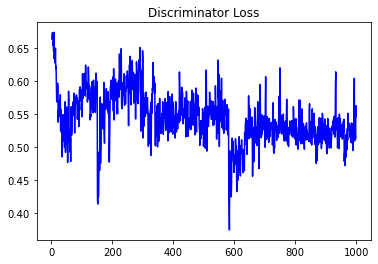

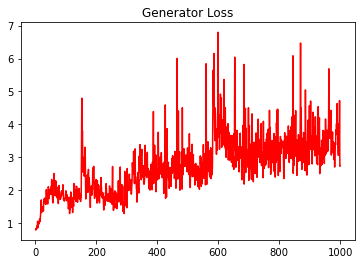

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.10460313199112167


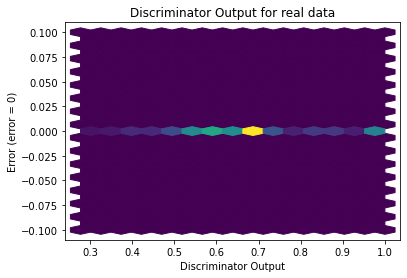

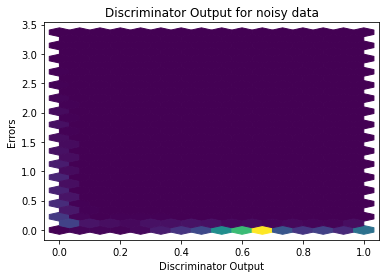

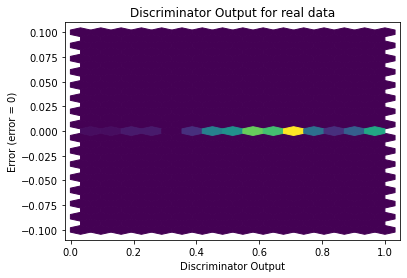

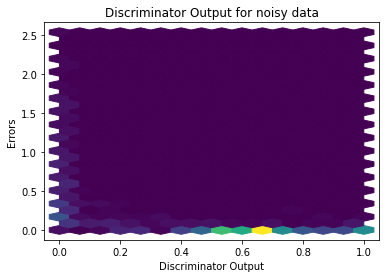

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


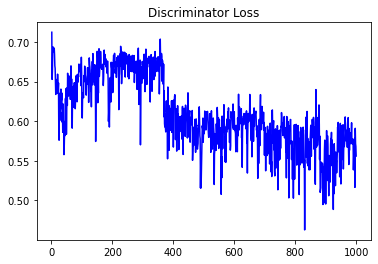

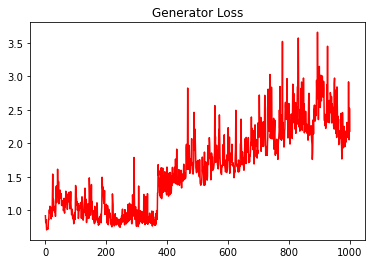

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.12199911240137533


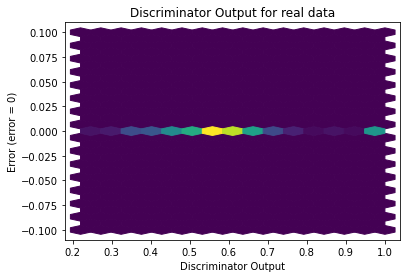

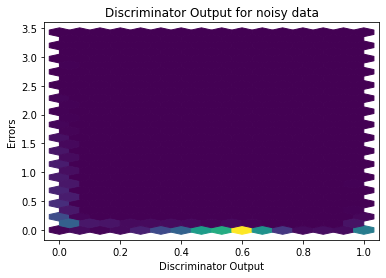

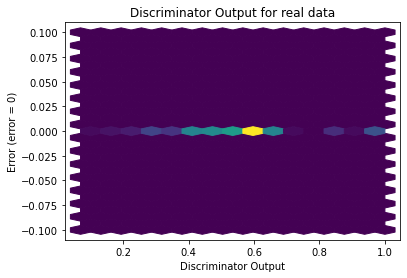

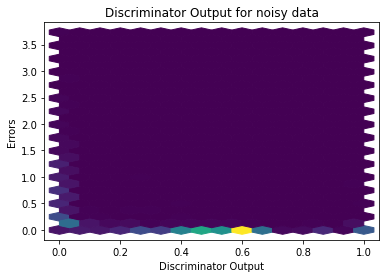

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


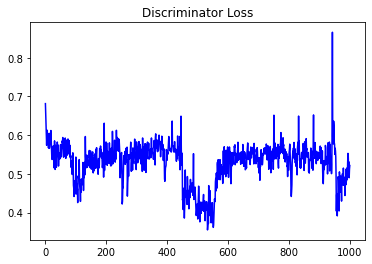

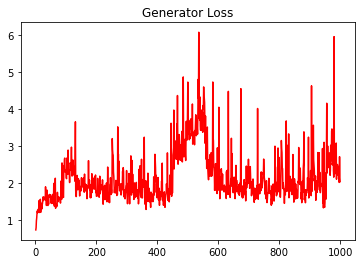

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.07202562750063159


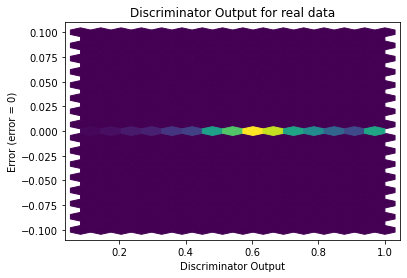

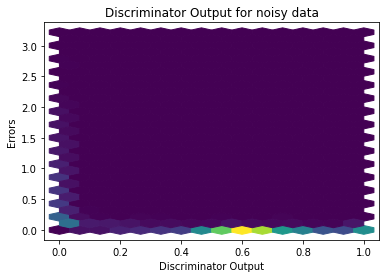

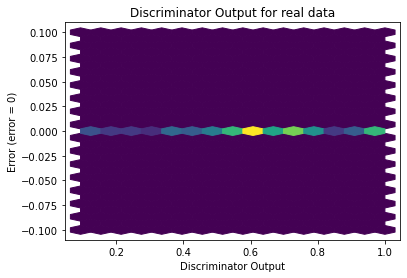

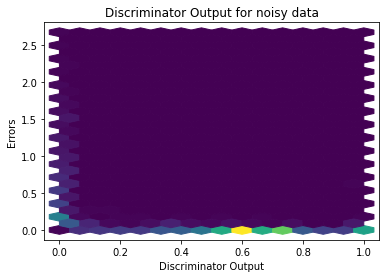

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9607]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9895]], requires_grad=True)
